# Determining the best combination 
This project is based on one simple experiment designed to encourage visitor to Obama’s selection website to sign up and donate, which was conducted by Obama’s fundraising campaign. Though this experiment, Obama’s team selected the bestperforming combination of button and media and increased click-through rate (CTR) as well as donations. 

Our project is a simple duplicate of this experiment with 24 different arms. Our task is to maximize the number of visitors who sign up to the website. It is essentially a multi-armed bandit model (MAB) with bandit feedback, and we try to identify the best arm by algorithms to get the highest total reward.

In [7]:
import numpy as np
import pandas as pd
import scipy.stats as st
import math
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import beta
import scipy.stats as st
from fitter import Fitter

## Fitting distribution

In [8]:
#read data
pull_data=[]
arm=[i for i in range(24)]
for i in arm:
    filepath='/Users/beijiale/Desktop/NUS/course/DBA5101/GP3/pull_data/pull_arm_{}.csv'.format(i)
    df=pd.read_csv(filepath,index_col=0,header=0)
    pull_data.append(df)
    exec(f'pull_arm_%s=df'%i)
#the result is that pull_data[i]=pull_arm_i
#pull_arm1--10000, others--1000

In [9]:
pull_arm_1['preward']=pull_arm_1['Reward']/100
error=st.uniform.rvs(loc=-0.5,scale=1,size=10000,random_state=101)
pull_arm_1['error']=error
pull_arm_1['x']=(pull_arm_1['Reward']+pull_arm_1['error'])/100

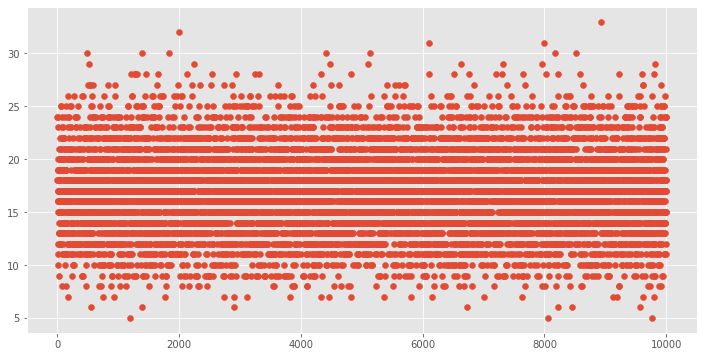

In [10]:
fig=plt.figure(figsize=(12,6))
plt.scatter(range(len(pull_arm_1)),pull_arm_1['Reward'])
plt.show()

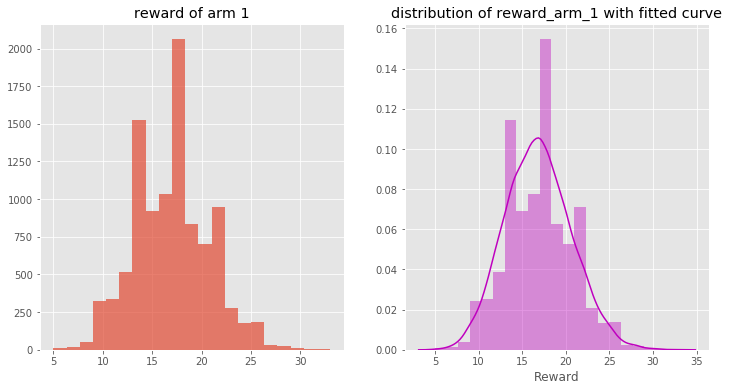

In [12]:
fig=plt.figure(figsize=(12,6))
ax1=fig.add_subplot(1,2,1)
plt.hist(pull_arm_1['Reward'],bins=21,alpha=0.7)
ax1.set_title("reward of arm 1")
ax2=plt.subplot(1,2,2)
sns.distplot(pull_arm_1['Reward'],bins=21,kde=True, color="m")
ax2.set_title("distribution of reward_arm_1 with fitted curve")
plt.show()

Fitted norm distribution with error=6867.685644339009)
Fitted t distribution with error=6867.688297317838)
Fitted laplace distribution with error=7011.136931067718)
Fitted beta distribution with error=6863.139983573724)
Fitted chi distribution with error=6863.219393510363)
Fitted chi2 distribution with error=6866.495941349373)
Fitted lognorm distribution with error=6863.552640222286)
Fitted gamma distribution with error=6863.494050235375)


{'beta': (21.708532323660314,
  48.38960379785202,
  -0.04538343526457635,
  0.6902575733315002)}

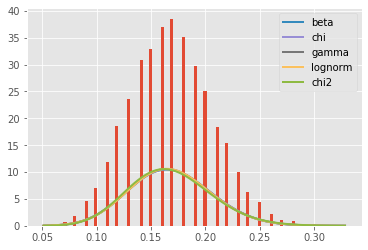

In [13]:
#fitting distribution

f = Fitter(pull_arm_1['preward'],distributions=['norm','t','laplace','beta','chi','chi2','lognorm','gamma'])
f.fit()
f.summary()
#f.fitted_param
f.get_best(method='sumsquare_error')

In [14]:
st.norm.fit(pull_arm_1['preward'])

(0.168381, 0.037848234291707715)

In [15]:
st.beta.fit(pull_arm_1['preward'],floc=0,fscale=1)

(15.939562109613137, 78.73732512713126, 0, 1)

Fitted norm distribution with error=21.04186641763222)
Fitted beta distribution with error=16.693360028164676)


{'beta': (21.832125283876678,
  48.83051069535119,
  -0.04632911928331257,
  0.6949765682324334)}

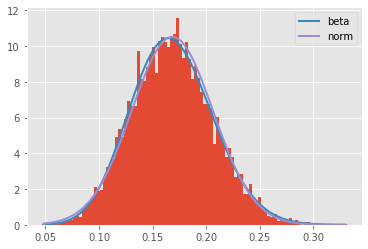

In [16]:
f = Fitter(pull_arm_1['x'],distributions=['norm','beta'])
f.fit()
f.summary()
#f.fitted_param
f.get_best(method='sumsquare_error')

Fitted norm distribution with error=21.04186641763222)
Fitted t distribution with error=21.043241020889692)
Fitted laplace distribution with error=187.8131389772109)
Fitted beta distribution with error=16.693360028164676)
Fitted chi distribution with error=16.71241734831058)
Fitted chi2 distribution with error=17.820021609161117)
Fitted lognorm distribution with error=16.979169844109183)
Fitted gamma distribution with error=16.93421197056792)


{'beta': (21.832125283876678,
  48.83051069535119,
  -0.04632911928331257,
  0.6949765682324334)}

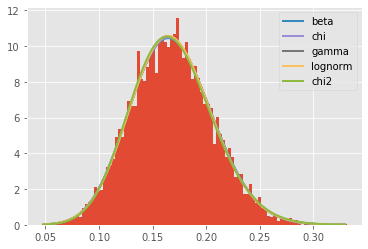

In [17]:
f = Fitter(pull_arm_1['x'],distributions=['norm','t','laplace','beta','chi','chi2','lognorm','gamma'])
f.fit()
f.summary()
#f.fitted_param
f.get_best(method='sumsquare_error')

In [18]:
f.df_errors

,sumsquare_error,aic,bic,kl_div
norm,21.041866,29.683598,-61619.842119,inf
t,21.043241,31.688764,-61609.978529,inf
laplace,187.813139,-77.643054,-39730.507770,inf
beta,16.693360,20.417403,-63916.451986,inf
chi,16.712417,13.872937,-63914.252729,inf
chi2,17.820022,1.984872,-63272.546352,inf
lognorm,16.979170,5.685652,-63755.899804,inf
gamma,16.934212,6.836349,-63782.413173,inf


In [19]:
descriptive=[]
for i in range(24):
    df=pull_data[i]['Reward']
    mean=np.mean(df)
    std=np.std(df)
    var=np.var(df)
    nmin=np.min(df)
    nmax=np.max(df)
    x=[mean,std,var,nmin,nmax]
    descriptive.append(x)
descriptive=pd.DataFrame(descriptive,columns=['mean','std','var','min','max'])
descriptive.head(5)

,mean,std,var,min,max
0,20.6440,3.968282,15.747264,8.0,33.0
1,16.8381,3.784823,14.324888,5.0,33.0
2,13.5210,3.361482,11.299559,4.0,28.0
3,13.9670,3.553577,12.627911,4.0,26.0
4,12.3640,3.307190,10.937504,3.0,24.0


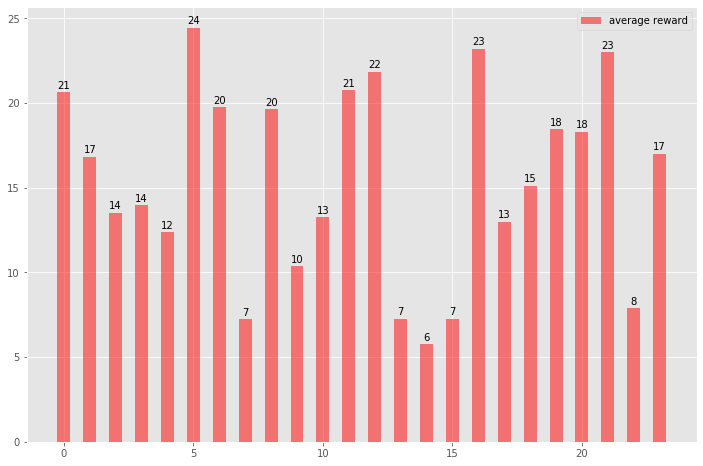

In [20]:
plt.figure(figsize=(12,8))
x=range(24)
y=descriptive['mean']
plt.bar(x, y, align="center", width=0.5, alpha=0.5,color='red',label='average reward')
for a, b in zip(x, y):
    plt.text(a, b + 0.1, '%.0f' % b, ha='center', va='bottom', fontsize=10)
plt.legend()
plt.show()

## Read data

In [114]:
pull_data=[]
arm=[i for i in range(24)]
for i in arm:
    filepath=r'D:\Users\Mingyu\Documents\Git\DBA5101\GA\pull_data\pull_arm_{}.csv'.format(i)
    df=pd.read_csv(filepath,index_col=0,header=0)
    pull_data.append(df)
    exec(f'pull_arm_%s=df'%i)

In [115]:
pull_data[0].head()

,Arm,NetReward,Pull,Reward
0,0,501860.0,32001.0,22.0
1,0,501876.0,32002.0,16.0
2,0,501894.0,32003.0,18.0
3,0,501911.0,32004.0,17.0
4,0,501932.0,32005.0,21.0


# 1. UCB1

In [138]:
t = 10000
narms = 24
n_j = np.zeros(24) # number of pulls for 24 arms
mu_j = np.zeros(24) # mean of rewards for 24 arms
mu_j_ucb = np.zeros(24) # mean of rewards for 24 arms
index_list = []
total_reward = 0

for armIdx in range(narms):
    z = np.random.randint(0, 999, 1)[0]
    n_j[armIdx] = n_j[armIdx] + 1
    reward = pull_data[armIdx]['Reward'][z]
    mu_j[armIdx] = reward
    total_reward += reward
    

for tcount in range(narms+1,t+1):
    z = np.random.randint(0, 999, 1)[0]
    index = 0
    max_upper_bound = 0
    # calculate UCB
    for j in range(0,narms):
            delta = math.sqrt(2 * math.log(tcount) / n_j[j])
            mu_j_ucb[j] = mu_j[j] + delta
    # pick arm with highest UCB
    index = np.argmax(mu_j_ucb)
    index_list.append(index)
    # update reward
    reward = pull_data[index]['Reward'][z]
    mu_j[index]=(mu_j[index]*n_j[index]+reward)/(n_j[index]+1)
    total_reward += reward
    # times +1
    n_j[index] += 1
    pass

In [139]:
mu_j_ucb

array([20.29193205, 21.29193205, 19.29193205, 16.29193205, 23.29193205,
       24.4779714 , 23.81128146, 11.29193205, 22.29193205, 12.29193205,
       18.29193205, 24.14461479, 23.03485426, 12.29193205,  9.29193205,
       15.29193205, 24.14596603, 12.29193205, 12.29193205, 21.53485426,
       21.29193205, 23.03485426, 11.29193205, 16.29193205])

In [140]:
n_j 

array([1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 9.967e+03,
       3.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 3.000e+00,
       2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 4.000e+00, 1.000e+00,
       1.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 1.000e+00])

## Regret

In [141]:
average_total_regret = (max(mu_j_ucb)*t - total_reward)/t
average_total_regret

0.10737139831109088

## Calculate average total regret

Turn: 2000-20000

For every turn, the number of experiments is 20.

In [426]:
t_list = []
regret_list = []
for t in range(2000,20000+1,2000):
    regret_n = []
    for n in range(20):
        narms = 24
        n_j = np.zeros(24) # number of pulls for 24 arms
        mu_j = np.zeros(24) # mean of rewards for 24 arms
        mu_j_ucb = np.zeros(24) # mean of rewards for 24 arms
        index_list = []
        total_reward = 0
        
        for armIdx in range(narms):
            z = np.random.randint(0, 999, 1)[0]
            n_j[armIdx] = n_j[armIdx] + 1
            reward = pull_data[armIdx]['Reward'][z]
            mu_j[armIdx] = reward
            total_reward += reward

        for tcount in range(narms+1,t+1):
            z = np.random.randint(0, 999, 1)[0]
            index = 0
            max_upper_bound = 0
            # calculate UCB
            for j in range(0,narms):
                delta = math.sqrt(2 * math.log(tcount) / n_j[j])
                mu_j_ucb[j] = mu_j[j] + delta
            # pick arm with highest UCB
            index = np.argmax(mu_j_ucb)
            index_list.append(index)
            # update reward
            reward = pull_data[index]['Reward'][z]
            mu_j[index]=(mu_j[index]*n_j[index]+reward)/(n_j[index]+1)
            total_reward += reward
            # times +1
            n_j[index] += 1

        regret_n.append(max(mu_j_ucb)*t - total_reward)

    t_list.append(t)
    regret_list.append(np.median(regret_n))

In [427]:
t_list = np.array(t_list)
regret_list = np.array(regret_list)
ucb1=pd.DataFrame([t_list,regret_list],index=['t','regret']).T
ucb1

,t,regret
0,2000.0,449.149545
1,4000.0,536.957293
2,6000.0,602.386126
3,8000.0,675.279781
4,10000.0,706.549314
5,12000.0,745.650435
6,14000.0,806.899125
7,16000.0,850.690575
8,18000.0,889.150064
9,20000.0,940.915944


# 2. Bayesian UCB (Unused)

In [120]:
t = 10000
narms = 24
n_j = np.zeros(24) # number of pulls for 24 arms
mu_j = np.zeros(24) # mean of rewards for 24 arms
mu_j_ucb = np.zeros(24) # ucb of rewards for 24 arms
record = {} # record of rewards for 24 arms
for i in range(24):
    record['arm' + str(i)] = []
std_j_ucb = np.zeros(24) # std of rewards for 24 arms
index_list = []
total_reward = 0

for armIdx in range(narms):
    z = np.random.randint(0, 999, 1)[0]
    n_j[armIdx] = n_j[armIdx] + 1
    rwd = pull_data[armIdx]['Reward'][z]
    mu_j[armIdx] = rwd
    record['arm'+str(armIdx)].append(rwd)
    std_j_ucb[armIdx] = np.std(record['arm'+str(armIdx)])
    total_reward += rwd

for tcount in range(narms+1,t+1):
    z = np.random.randint(0, 999, 1)[0]
    index = 0
    max_upper_bound = 0
    # calculate UCB
    for j in range(0,narms):
            delta = 1.96* std_j_ucb[j]/ np.sqrt(n_j[j])
            mu_j_ucb[j] = mu_j[j] + delta
    # pick arm with highest UCB
    index = np.argmax(mu_j_ucb)
    index_list.append(index)
    # update reward
    reward = pull_data[index]['Reward'][z]
    record['arm'+str(index)].append(reward)
    mu_j[index] = np.mean(record['arm'+str(index)])
    std_j_ucb[index] = np.std(record['arm'+str(index)])
    total_reward += reward
    # times +1
    n_j[index] += 1
    pass

In [121]:
mu_j_ucb

array([19.        , 15.        ,  9.        , 11.        , 13.        ,
       24.51692827, 15.        ,  4.        , 23.        , 12.        ,
       15.        , 23.        , 22.        ,  6.        ,  2.        ,
        7.        , 22.        ,  9.        , 11.        , 14.        ,
       18.        , 24.21748687,  5.        , 15.        ])

In [122]:
n_j 

array([1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 9.973e+03,
       1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
       1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
       1.000e+00, 1.000e+00, 1.000e+00, 5.000e+00, 1.000e+00, 1.000e+00])

## Regret

In [123]:
average_total_regret = (## Calculate average total regret

Turn: 2000-20000

For every turn, the number of experiments is 10.max(mu_j_ucb)*t - total_reward)/t
average_total_regret

0.14642826731661918

## Calculate average total regret

Turn: 2000-20000

For every turn, the number of experiments is 10.

In [195]:
t_list = []
regret_list = []
for t in range(2000,20000+1,2000):
    #regret_n = []
    #for n in range(10):
        narms = 24
        n_j = np.zeros(24) # number of pulls for 24 arms
        mu_j = np.zeros(24) # mean of rewards for 24 arms
        mu_j_ucb = np.zeros(24) # mean of rewards for 24 arms
        record = {} # record of rewards for 24 arms
        for i in range(24):
            record['arm' + str(i)] = []
        std_j_ucb = np.zeros(24) # std of rewards for 24 arms
        index_list = []
        total_reward = 0

        for armIdx in range(narms):
            z = np.random.randint(0, 999, 1)[0]
            n_j[armIdx] = n_j[armIdx] + 1
            rwd = pull_data[armIdx]['Reward'][z]
            mu_j[armIdx] = rwd
            record['arm'+str(armIdx)].append(rwd)
            std_j_ucb[armIdx] = np.std(record['arm'+str(armIdx)])
            total_reward += rwd

        for tcount in range(narms+1,t+1):
            z = np.random.randint(0, 999, 1)[0]
            index = 0
            max_upper_bound = 0
            # calculate UCB
            for j in range(0,narms):
                delta = 1.96* std_j_ucb[j]/ np.sqrt(n_j[j])
                mu_j_ucb[j] = mu_j[j] + delta
            # pick arm with highest UCB
            index = np.argmax(mu_j_ucb)
            index_list.append(index)
            # update reward
            reward = pull_data[index]['Reward'][z]
            record['arm'+str(index)].append(reward)
            mu_j[index] = np.mean(record['arm'+str(index)])
            std_j_ucb[index] = np.std(record['arm'+str(index)])
            total_reward += reward
            # times +1
            n_j[index] += 1

        #regret_n.append(max(mu_j_ucb)*t - total_reward)
        t_list.append(t)
    #regret_list.append(np.median(regret_n))
    regret_list.append(max(mu_j_ucb)*t - total_reward)

In [196]:
t_list = np.array(t_list)
regret_list = np.array(regret_list)
bysn_ucb=pd.DataFrame([t_list,regret_list],index=['t','regret']).T
bysn_ucb

,t,regret
0,2000.0,649.018420
1,4000.0,749.416168
2,6000.0,1158.940322
3,8000.0,1141.946426
4,10000.0,1153.285024
5,12000.0,1215.877839
6,14000.0,1257.183377
7,16000.0,1806.635491
8,18000.0,1477.330373
9,20000.0,1437.195577


# 3. Thompson Sampling

In [124]:
import random
t = 10000
narms = 24
n_j = np.zeros(24) # number of pulls for 24 arms
alpha_j = [0] * narms
beta_j = [0] * narms
index_list = []
total_reward = 0

for armIdx in range(narms):
    z = np.random.randint(0, 999, 1)[0]
    reward = pull_data[armIdx]['Reward'][z]
    n_j[armIdx] = n_j[armIdx] + 1
    alpha_j[armIdx] = alpha_j[armIdx] + reward
    beta_j[armIdx] = beta_j[armIdx] + 100 - reward
    total_reward += reward
    
for tcount in range(narms+1, t+1):
    z = np.random.randint(0, 999, 1)[0]
    index = 0
    max_random = 0
    for j in range(0, narms):
        random_beta = random.betavariate(alpha_j[j], beta_j[j])
        #pick arm with highest random_beta
        if random_beta > max_random:
            max_random = random_beta
            index = j
    index_list.append(index)
    # update beta and alpha
    reward = pull_data[index]['Reward'][z]
    alpha_j[index] = alpha_j[index] + reward
    beta_j[index] = beta_j[index] + 100 - reward
    total_reward += reward
    # times +1
    n_j[index] += 1
    pass

In [125]:
n_j

array([1.100e+01, 3.000e+00, 1.000e+00, 3.000e+00, 1.000e+00, 9.834e+03,
       1.500e+01, 2.000e+00, 6.000e+00, 1.000e+00, 2.000e+00, 2.200e+01,
       5.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 3.200e+01, 4.000e+00,
       3.000e+00, 7.000e+00, 8.000e+00, 3.200e+01, 1.000e+00, 4.000e+00])

In [126]:
alpha_j/n_j

array([19.63636364, 14.33333333,  6.        , 13.66666667,  9.        ,
       24.43827537, 20.6       ,  8.5       , 17.33333333,  7.        ,
       14.        , 21.36363636, 17.6       ,  3.        ,  5.        ,
        9.        , 21.90625   , 14.75      , 12.33333333, 18.28571429,
       17.5       , 21.90625   ,  4.        , 15.        ])

## Regret

In [127]:
average_total_regret = (max(alpha_j/n_j)*t - total_reward)/t
average_total_regret

0.08717537116127787

## Calculate average total regret

Turn: 2000-20000

For every turn, the number of experiments is 20.

In [424]:
import random
t_list = []
regret_list = []
for t in range(2000,20000+1,2000):
    regret_n = []
    for n in range(20):
        narms = 24
        n_j = np.zeros(24) # number of pulls for 24 arms
        alpha_j = [0] * narms
        beta_j = [0] * narms
        index_list = []
        total_reward = 0

        for armIdx in range(narms):
            z = np.random.randint(0, 999, 1)[0]
            n_j[armIdx] = n_j[armIdx] + 1
            alpha_j[armIdx] = alpha_j[armIdx] + reward
            beta_j[armIdx] = beta_j[armIdx] + 100 - reward
            total_reward += reward## Calculate average total regret

        for tcount in range(narms+1, t+1):
            z = np.random.randint(0, 999, 1)[0]
            index = 0
            max_random = 0
            for j in range(0, narms):
                random_beta = random.betavariate(alpha_j[j], beta_j[j])
                #pick arm with highest random_beta
                if random_beta > max_random:
                    max_random = random_beta
                    index = j
            index_list.append(index)
            # update beta and alpha
            reward = pull_data[index]['Reward'][z]
            alpha_j[index] = alpha_j[index] + reward
            beta_j[index] = beta_j[index] + 100 - reward
            total_reward += reward
            # times +1
            n_j[index] += 1

        regret_n.append(max(alpha_j/n_j)*t - total_reward)
        
    t_list.append(t)
    regret_list.append(np.median(regret_n))

In [425]:
t_list = np.array(t_list)
regret_list = np.array(regret_list)
ts=pd.DataFrame([t_list,regret_list],index=['t','regret']).T
ts

,t,regret
0,2000.0,901.916271
1,4000.0,1049.730760
2,6000.0,1111.642217
3,8000.0,1147.104980
4,10000.0,1143.195154
5,12000.0,1186.774346
6,14000.0,1194.059279
7,16000.0,1216.837519
8,18000.0,1236.961989
9,20000.0,1251.344629


# 4. Epsilon greedy

## Choose the best epsilon

In [397]:
regret_list = []
ep_list = np.arange(0.01, 1.0, 0.05)
for epsilon in ep_list:
    regret_n=[]
    for n in range(10):
        t = 10000
        narms = 24
        n_j = np.zeros(24) # number of pulls for 24 arms
        mu_j = np.zeros(24) # mean of rewards for 24 arms
        index_list = []
        total_reward = 0
        for tcount in range(1,t+1):
            index = 0
            # pick arm
            if np.random.rand() > epsilon:
                index = np.argmax(mu_j)
            else:
                index = np.random.randint(0, narms)
            index_list.append(index)
            # update reward
            z = np.random.randint(0, 999, 1)[0] 
            reward = pull_data[index]['Reward'][z]
            mu_j[index]=(mu_j[index]*n_j[index]+reward)/(n_j[index]+1)
            total_reward += reward
            # times +1
            n_j[index] += 1
        regret_n.append(max(mu_j)*t - total_reward)
    regret_list.append(np.median(regret_n))


In [398]:
regret_list = np.array(regret_list)
choose=pd.DataFrame([ep_list,regret_list],index=['epsilon','regret']).T

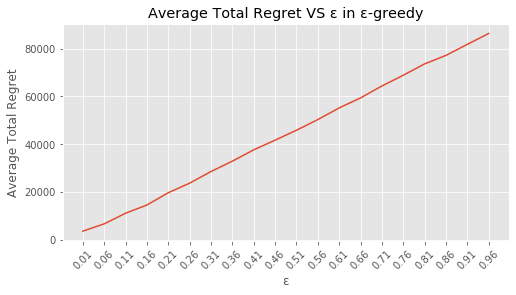

In [437]:
fig, ax1 = plt.subplots(figsize=(8, 4))
sns.lineplot(choose['epsilon'], choose['regret'])
plt.xlabel('ε')
plt.ylabel('Average Total Regret')
plt.title('Average Total Regret VS ε in ε-greedy')
plt.xticks(choose['epsilon'])
plt.xticks(rotation=45)
           
plt.plot()
plt.show()

## Calculate average total regret

Turn: 2000-20000

For every turn, the number of experiments is 20.

In [413]:
t_list = []
regret_list = []
for t in range(2000,20000+1,2000):
    regret_n = []
    epsilon = 0.01
    for n in range(20):
        narms = 24
        n_j = np.zeros(24) # number of pulls for 24 arms
        mu_j = np.zeros(24) # mean of rewards for 24 arms
        total_reward = 0
        
        for tcount in range(1,t+1):
            index = 0
            # pick arm
            if np.random.rand() > epsilon:
                index = np.argmax(mu_j)## Calculate average total regret

            else:
                index = np.random.randint(0, narms)
            index_list.append(index)
            # update reward
            z = np.random.randint(0, 999, 1)[0] 
            reward = pull_data[index]['Reward'][z]
            mu_j[index]=(mu_j[index]*n_j[index]+reward)/(n_j[index]+1)
            total_reward += reward
            # times +1
            n_j[index] += 1
        regret_n.append(max(mu_j)*t - total_reward)
        
    t_list.append(t)
    regret_list.append(np.median(regret_n))

In [414]:
t_list = np.array(t_list)
regret_list = np.array(regret_list)
ep=pd.DataFrame([t_list,regret_list],index=['t','regret']).T
ep

,t,regret
0,2000.0,1556.866928
1,4000.0,3401.925075
2,6000.0,3597.592964
3,8000.0,4681.363850
4,10000.0,3771.263793
5,12000.0,5598.005003
6,14000.0,3990.377107
7,16000.0,6182.184599
8,18000.0,5356.060703
9,20000.0,9721.141957


# 6. Aaptive Epsilon-greedy

In [356]:
x = np.arange(0.5, 1.0, 0.05)
a = np.arange(0.95,1.0,0.01)
ep_list = []
decay_list = []
regret_list = []
mu_list = []

for epsilon in x:
    for decay in a:
        t = 10000
        narms =24
        n_j = np.zeros(24)
        mu_j = np.zeros(24)
        index_list=[]
        total_reward = 0
        
        for tcount in range(1,t+1):
            index = 0
            rand_num = np.random.random()
            b = (decay**tcount)*epsilon
            
            if rand_num > b:
                index = np.argmax(mu_j)
            else:
                index = np.random.randint(0, narms)
    
            index_list.append(index)
            z = np.random.randint(0, 999, 1)[0]
            reward = pull_data[index]['Reward'][z]
            mu_j[index]=(mu_j[index]*n_j[index]+reward)/(n_j[index]+1)
            total_reward += reward
            # times +1
            n_j[index] += 1
                

        #regret = max(mu_j)*t - total_reward
        regret = 24.5*t - total_reward
        regret_list.append(regret)
        ep_list.append(epsilon)
        decay_list.append(decay)
        mu_list.append(mu_j[5])

In [362]:
#ep_list = np.array(ep_list)
#decay_list = np.array(decay_list)
#regret_list = np.array(regret_list)
#mu_list = np.array(mu_list)
#choose=pd.DataFrame([ep_list,decay_list ,regret_list,mu_list],index=['epsilon','decay','regret','mu_6']).T
#choose[choose['mu_6']>=24].sort_values(['regret'],ascending = True).head()

## Calculate average total regret

Turn: 2000-20000

For every turn, the experiment number is 20.

### epsilon = 1/t

In [429]:
t_list = []
regret_list = []
for t in range(2000,20000+1,2000):
    regret_n = []
    for n in range(20):
        narms = 24
        n_j = np.zeros(24) # number of pulls for 24 arms
        mu_j = np.zeros(24) # mean of rewards for 24 arms
        total_reward = 0
        
        for tcount in range(1,t+1):
            index = 0
            rand_num = np.random.random()
            b = 1/tcount
            
            if rand_num > b:
                index = np.argmax(mu_j)
            else:
                index = np.random.randint(0, narms)
            index_list.append(index)
            # update reward
            z = np.random.randint(0, 999, 1)[0] 
            reward = pull_data[index]['Reward'][z]
            mu_j[index]=(mu_j[index]*n_j[index]+reward)/(n_j[index]+1)
            total_reward += reward
            # times +1## Calculate average total regret

            n_j[index] += 1
        regret_n.append(max(mu_j)*t - total_reward)
        
    t_list.append(t)
    regret_list.append(np.median(regret_n))

In [430]:
t_list = np.array(t_list)
regret_list = np.array(regret_list)
adaptive_ep_t=pd.DataFrame([t_list,regret_list],index=['t','regret']).T
adaptive_ep_t

,t,regret
0,2000.0,145.599223
1,4000.0,189.922881
2,6000.0,105.708460
3,8000.0,136.948149
4,10000.0,143.474914
5,12000.0,144.931750
6,14000.0,815.982816
7,16000.0,122.480490
8,18000.0,768.392109
9,20000.0,210.842557


In [433]:
n_j

array([0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 1.9995e+04, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00])

### eps = 0.99, decay_rate = 0.9

In [421]:
t_list = []
regret_list = []
for t in range(2000,20000+1,2000):
    regret_n = []
    for n in range(20):
        narms = 24
        n_j = np.zeros(24) # number of pulls for 24 arms
        mu_j = np.zeros(24) # mean of rewards for 24 arms
        total_reward = 0
        decay = 0.99
        epsilon = 0.9
        
        for tcount in range(1,t+1):
            index = 0
            rand_num = np.random.random()
            b = (decay**tcount)*epsilon
            
            if rand_num > b:
                index = np.argmax(mu_j)
            else:
                index = np.random.randint(0, narms)
            index_list.append(index)
            # update reward
            z = np.random.randint(0, 999, 1)[0] 
            reward = pull_data[index]['Reward'][z]
            mu_j[index]=(mu_j[index]*n_j[index]+reward)/(n_j[index]+1)
            total_reward += reward
            # times +1## Calculate average total regret

            n_j[index] += 1
        regret_n.append(max(mu_j)*t - total_reward)
        
    t_list.append(t)
    regret_list.append(np.median(regret_n))

In [422]:
t_list = np.array(t_list)
regret_list = np.array(regret_list)
adaptive_ep=pd.DataFrame([t_list,regret_list],index=['t','regret']).T
adaptive_ep

,t,regret
0,2000.0,840.006803
1,4000.0,893.958398
2,6000.0,823.244159
3,8000.0,821.254755
4,10000.0,858.779052
5,12000.0,840.849085
6,14000.0,813.223087
7,16000.0,836.903285
8,18000.0,866.890465
9,20000.0,843.199144


# Graph

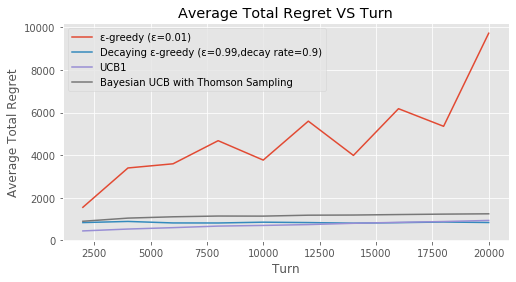

In [440]:
fig, ax1 = plt.subplots(figsize=(8, 4))
sns.lineplot(ep['t'], ep['regret'], label = 'ε-greedy (ε=0.01)')
sns.lineplot(adaptive_ep['t'], adaptive_ep['regret'], label  = 'Decaying ε-greedy (ε=0.99,decay rate=0.9)')
sns.lineplot(ucb1['t'], ucb1['regret'], label  = 'UCB1')
#plt.plot(bysn_ucb['t'], bysn_ucb['regret'], label = 'Beyesian UCB')
sns.lineplot(ts['t'], ts['regret'], label  = 'Bayesian UCB with Thomson Sampling')
plt.xlabel('Turn')
plt.ylabel('Average Total Regret')
plt.title('Average Total Regret VS Turn')
plt.legend()

plt.plot()
plt.show()